In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the data

df=pd.read_csv("/Users/jaypatel/Downloads/zepto_data_cleaned.csv")

In [11]:
df.head(5)

,Category,name,mrp,discount_percent,available_quantity,discounted_selling_price,weight_in_gms,out_of_stock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,0,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,0,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,0,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,0,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,0,250


In [13]:
# Shape and structure
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

# Null values
df.isnull().sum()

Rows: 3732, Columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  3732 non-null   object
 1   name                      3732 non-null   object
 2   mrp                       3732 non-null   int64 
 3   discount_percent          3732 non-null   int64 
 4   available_quantity        3732 non-null   int64 
 5   discounted_selling_price  3732 non-null   int64 
 6   weight_in_gms             3732 non-null   int64 
 7   out_of_stock              3732 non-null   int64 
 8   quantity                  3732 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 262.5+ KB


Category                    0
name                        0
mrp                         0
discount_percent            0
available_quantity          0
discounted_selling_price    0
weight_in_gms               0
out_of_stock                0
quantity                    0
dtype: int64

Average Discount Percentage by Category:
Category
Fruits & Vegetables      15.462366
Meats, Fish & Eggs       11.031746
Chocolates & Candies      8.324742
Ice Cream & Desserts      8.324742
Packaged Food             8.324742
Biscuits                  8.244898
Health & Hygiene          8.051546
Cooking Essentials        7.163424
Munchies                  7.163424
Beverages                 7.155039
Dairy, Bread & Batter     7.155039
Paan Corner               6.250000
Personal Care             6.250000
Home & Cleaning           5.675258
Name: discount_percent, dtype: float64


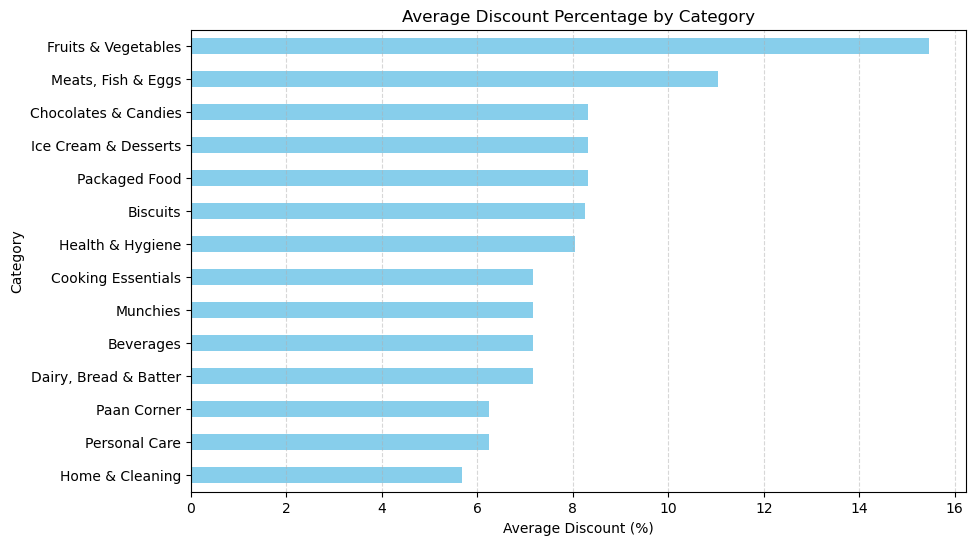

In [17]:
# 1. Which categories offer the highest discounts on average?

# Group the data by Category and calculate the average discount percentage
category_discount = df.groupby('Category')['discount_percent'].mean()

# Sort the result in descending order
category_discount_sorted = category_discount.sort_values(ascending=False)

# Print the result
print("Average Discount Percentage by Category:")
print(category_discount_sorted)

# Plot a bar chart
import matplotlib.pyplot as plt

category_discount_sorted.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Average Discount (%)")
plt.title("Average Discount Percentage by Category")
plt.gca().invert_yaxis()  # Highest discount on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Out-of-Stock Counts by Category:
Category
Cooking Essentials       64
Munchies                 64
Chocolates & Candies     45
Ice Cream & Desserts     45
Packaged Food            45
Biscuits                 42
Beverages                28
Dairy, Bread & Batter    28
Paan Corner              21
Personal Care            21
Home & Cleaning          19
Health & Hygiene         13
Meats, Fish & Eggs       12
Fruits & Vegetables       6
dtype: int64


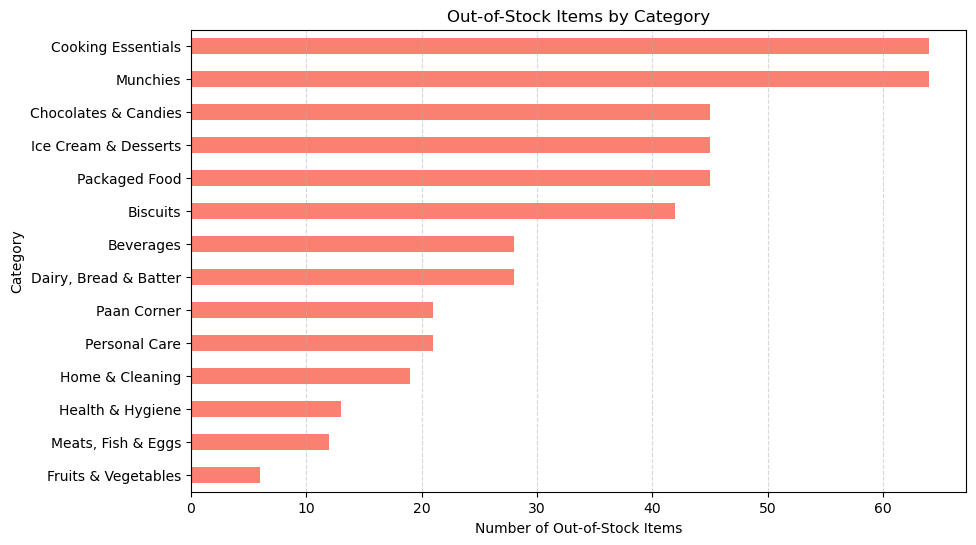

In [19]:
# Q2: Which categories have the highest number of out-of-stock items?

# Filter only the out-of-stock items
out_of_stock_items = df[df['out_of_stock'] == True]

# Group by Category and count the number of out-of-stock items
out_of_stock_count = out_of_stock_items.groupby('Category').size()

# Sort in descending order
out_of_stock_sorted = out_of_stock_count.sort_values(ascending=False)

# Print the result
print("Out-of-Stock Counts by Category:")
print(out_of_stock_sorted)

# Plot the result
out_of_stock_sorted.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.xlabel("Number of Out-of-Stock Items")
plt.title("Out-of-Stock Items by Category")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Average MRP by Category:
Category
Paan Corner              20711.918605
Personal Care            20711.918605
Meats, Fish & Eggs       18728.571429
Health & Hygiene         15917.525773
Cooking Essentials       15653.501946
Munchies                 15653.501946
Chocolates & Candies     15572.680412
Ice Cream & Desserts     15572.680412
Packaged Food            15572.680412
Home & Cleaning          15215.463918
Beverages                11870.542636
Dairy, Bread & Batter    11870.542636
Biscuits                  5948.979592
Fruits & Vegetables       4701.075269
Name: mrp, dtype: float64


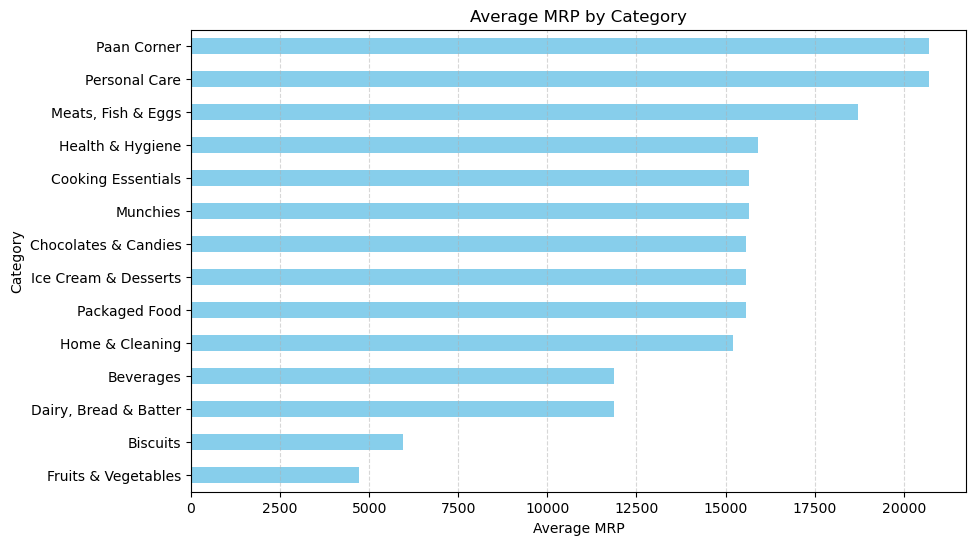

In [21]:
# Q3: Which categories have the highest average MRP (Maximum Retail Price)?

# Group by Category and calculate the average MRP
average_mrp_by_category = df.groupby('Category')['mrp'].mean()

# Sort the results in descending order
average_mrp_sorted = average_mrp_by_category.sort_values(ascending=False)

# Print the top categories with highest average MRP
print("Average MRP by Category:")
print(average_mrp_sorted)

# Plot the result
average_mrp_sorted.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Average MRP")
plt.title("Average MRP by Category")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


Average Available Stock by Category:
Category
Health & Hygiene         4.381443
Home & Cleaning          4.324742
Cooking Essentials       4.252918
Munchies                 4.252918
Paan Corner              4.238372
Personal Care            4.238372
Chocolates & Candies     3.920103
Ice Cream & Desserts     3.920103
Packaged Food            3.920103
Beverages                3.759690
Dairy, Bread & Batter    3.759690
Biscuits                 3.047619
Fruits & Vegetables      2.956989
Meats, Fish & Eggs       2.412698
Name: available_quantity, dtype: float64


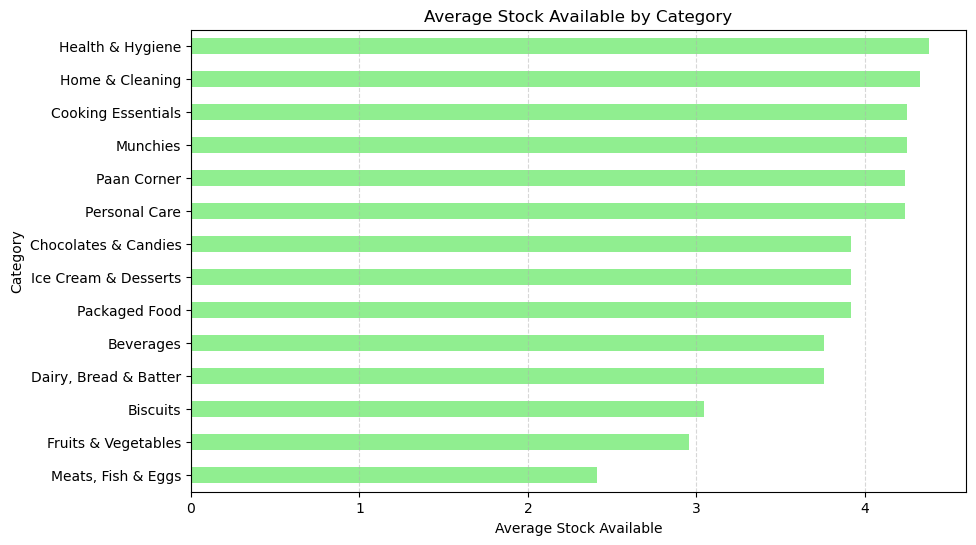

In [23]:
# Q4: Which categories have the highest available stock on average?

# Group by Category and calculate the average available quantity
avg_stock_by_category = df.groupby('Category')['available_quantity'].mean()

# Sort the results in descending order
avg_stock_sorted = avg_stock_by_category.sort_values(ascending=False)

# Print the top categories by stock
print("Average Available Stock by Category:")
print(avg_stock_sorted)

# Plot the result
avg_stock_sorted.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.xlabel("Average Stock Available")
plt.title("Average Stock Available by Category")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


Out-of-Stock Percentage by Category:
category
Biscuits                 28.571429
Beverages                21.705426
Dairy, Bread & Batter    21.705426
Meats, Fish & Eggs       19.047619
Health & Hygiene         13.402062
Cooking Essentials       12.451362
Munchies                 12.451362
Chocolates & Candies     11.597938
Ice Cream & Desserts     11.597938
Packaged Food            11.597938
Home & Cleaning           9.793814
Fruits & Vegetables       6.451613
Paan Corner               6.104651
Personal Care             6.104651
dtype: float64


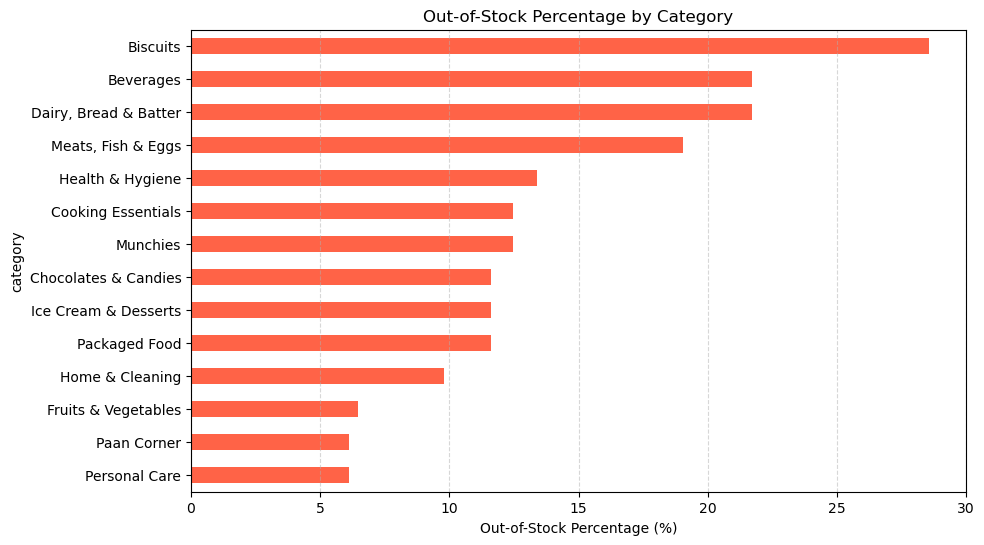

In [86]:
# Q5: What is the out-of-stock percentage by category?

# Calculate total items per category
total_items_by_category = df.groupby('Category').size()

# Calculate out-of-stock items per category
out_of_stock_items_by_category = df[df['out_of_stock'] == True].groupby('Category').size()

# Calculate out-of-stock percentage
out_of_stock_percentage = (out_of_stock_items_by_category / total_items_by_category) * 100

# Fill NaN with 0 for categories with no out-of-stock items
out_of_stock_percentage = out_of_stock_percentage.fillna(0)

# Sort descending
out_of_stock_percentage_sorted = out_of_stock_percentage.sort_values(ascending=False)

# Print the percentages
print("Out-of-Stock Percentage by Category:")
print(out_of_stock_percentage_sorted)

# Plot the result
out_of_stock_percentage_sorted.plot(kind='barh', figsize=(10, 6), color='tomato')
plt.xlabel("Out-of-Stock Percentage (%)")
plt.title("Out-of-Stock Percentage by Category")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
